<a href="https://colab.research.google.com/github/BakedBel/CodigosTesis/blob/main/automatic_undergrad_thesis_code_spectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT THE LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd


# IMPORT AND CREATE THE LIST OF MATRICES

In [ ]:
def read_flux_data(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    matrices = {}
    current_flux = None

    for line in lines:
        line = line.strip()
        if line.startswith('# primitive scorer name: flux'):
            flux_id = line.split('flux')[-1]
            current_flux = f"flux{flux_id}"
            if current_flux not in matrices:
                matrices[current_flux] = np.zeros((256, 256))
        elif current_flux and not line.startswith('#'):
            data = line.split(',')
            if len(data) >= 4:
                ix, iy, value = int(data[0]), int(data[1]), float(data[3])
                matrices[current_flux][iy, ix] = value
    return matrices

# Ejemplo de uso
filename = "spectrum_19.txt"  # Cambia esto por el nombre de tu archivo
matrices = read_flux_data(filename)

def read_flux_data(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    matrices = {}
    current_flux = None

    for line in lines:
        line = line.strip()
        if line.startswith('# primitive scorer name: flux'):
            flux_id = line.split('flux')[-1]
            current_flux = f"flux{flux_id}"
            if current_flux not in matrices:
                matrices[current_flux] = np.zeros((256, 256))
        elif current_flux and not line.startswith('#'):
            data = line.split(',')
            if len(data) >= 4:
                ix, iy, value = int(data[0]), int(data[1]), float(data[3])
                matrices[current_flux][iy, ix] = value

    return matrices


#================================================================== FLAT FIELD CORRECTION =========================================================================#

# Ejemplo de uso
filename_FF = "spectrum_19FF.txt"  # Cambia esto por el nombre de tu archivo
matrices_FF = read_flux_data(filename_FF)

Corr_matrices = {}
for i in matrices:
    Corr_matrices[i] = matrices[i]/matrices_FF[i]


for l in Corr_matrices:
    max = 0
    for i in range (0, 256):
        for j in range (0,256):
            if Corr_matrices[l][i, j] > max:
                max = Corr_matrices[l][i, j]
            else:
                None
            j = j + 1
        i = i + 1
    Corr_matrices[l] = Corr_matrices[l]/max


#=========================================================INVOQUE ANY INTENSITY IMAGE =================================================================

def plot_intensity_map(matrix):
    if matrix is not None:
        plt.imshow(matrix, cmap='bone', origin='lower')
        plt.colorbar(label='Intensidad')
        plt.title(f"Mapa de Intensidad (18 keV)")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()

#plot_intensity_map(Corr_matrices["flux10"])


#==================================================== TOTAL PROJECTED THICKNESS =============================================================================

def read_flux_data(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    matrices = {}
    current_flux = None

    for line in lines:
        line = line.strip()
        if line.startswith('# primitive scorer name: flux'):
            flux_id = line.split('flux')[-1]
            current_flux = f"flux{flux_id}"
            if current_flux not in matrices:
                matrices[current_flux] = np.zeros((256, 256))
        elif current_flux and not line.startswith('#'):
            data = line.split(',')
            if len(data) >= 4:
                ix, iy, value = int(data[0]), int(data[1]), float(data[3])
                matrices[current_flux][iy, ix] = value

    return matrices

# Ejemplo de uso

filename_TT = "spectrum_19Thi.txt"  # Cambia esto por el nombre de tu
matrices_TT = read_flux_data(filename_TT)

Corr_matrices_A = {}
for i in matrices:
    Corr_matrices_A[i] = matrices_TT[i]/matrices_FF[i]


for l in Corr_matrices_A:
    max = 0
    for i in range (0, 256):
        for j in range (0,256):
            if Corr_matrices_A[l][i, j] > max:
                max = Corr_matrices_A[l][i, j]
            else:
                None
            j = j + 1
        i = i + 1
    Corr_matrices_A[l] = Corr_matrices_A[l]/max

#======================================================INVOQUE ANY TOTAL THICKNESS IMAGE===========================================================#

def plot_intensity_map(matrix):
    if matrix is not None:
        plt.imshow(matrix, cmap='bone', origin='lower')
        plt.colorbar(label='Intensidad')
        plt.title(f"Mapa de Intensidad (18 keV)")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()

#plot_intensity_map(Corr_matrices_A["flux10"])


<ipython-input-2-3ca04f7f9a09>:57: RuntimeWarning: invalid value encountered in divide
  Corr_matrices[i] = matrices[i]/matrices_FF[i]
<ipython-input-2-3ca04f7f9a09>:57: RuntimeWarning: divide by zero encountered in divide
  Corr_matrices[i] = matrices[i]/matrices_FF[i]
<ipython-input-2-3ca04f7f9a09>:70: RuntimeWarning: invalid value encountered in divide
  Corr_matrices[l] = Corr_matrices[l]/max
<ipython-input-2-3ca04f7f9a09>:118: RuntimeWarning: invalid value encountered in divide
  Corr_matrices_A[i] = matrices_TT[i]/matrices_FF[i]
<ipython-input-2-3ca04f7f9a09>:118: RuntimeWarning: divide by zero encountered in divide
  Corr_matrices_A[i] = matrices_TT[i]/matrices_FF[i]
<ipython-input-2-3ca04f7f9a09>:131: RuntimeWarning: invalid value encountered in divide
  Corr_matrices_A[l] = Corr_matrices_A[l]/max


# CREATE A TOTAL INTENSITY IMAGE

<ipython-input-3-4ab5e2b0033e>:13: RuntimeWarning: invalid value encountered in divide
  intensity = intensity/max


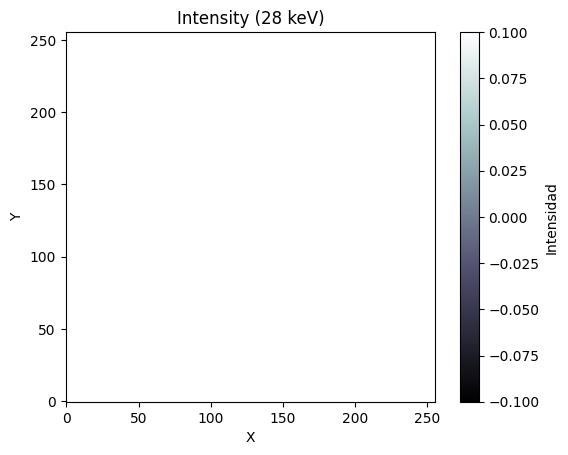

<ipython-input-3-4ab5e2b0033e>:39: RuntimeWarning: invalid value encountered in divide
  intensity_A = intensity_A/max


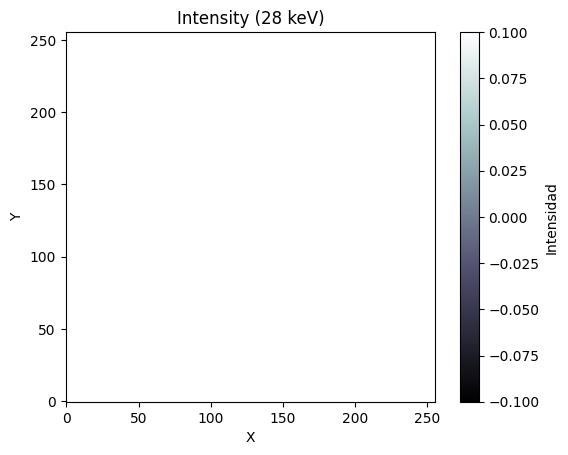

In [ ]:
intensity = np.zeros((256,256))

for key in Corr_matrices:
    if not np.any(np.isnan(Corr_matrices[key])):  # Verifica si hay al menos un NaN
        intensity += Corr_matrices[key]  # Suma la matriz si está limpia= intensity + Corr_matrices[l]

max = 0
for i in range (0,256):
    for j in range (0,256):
        if intensity[i][j] > max:
            max = intensity[i][j]

intensity = intensity/max

np.savetxt("total_intensity.txt", np.real(intensity), fmt="%.5f")

plt.imshow(intensity, cmap='bone', origin='lower')
plt.colorbar(label='Intensidad')
plt.title(f"Intensity (28 keV)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


#========================================================== CREATE A TOTAL THICKNESS IMAGE ========================================================================#

intensity_A = np.zeros((256,256))

for key in Corr_matrices_A:
    if not np.any(np.isnan(Corr_matrices_A[key])):  # Verifica si hay al menos un NaN
        intensity_A += Corr_matrices_A[key]  # Suma la matriz si está limpia= intensity + Corr_matrices[l]

maxA = 0
for i in range (0,256):
    for j in range (0,256):
        if intensity_A[i][j] > max:
            maxA = intensity_A[i][j]

intensity_A = intensity_A/max

#np.savetxt("total_intensity_A.txt", np.real(intensity_A), fmt="%.5f")

plt.imshow(intensity_A, cmap='bone', origin='lower')
plt.colorbar(label='Intensidad')
plt.title(f"Intensity (28 keV)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# THE PHASE RETRIEVAL METHOD FOR EACH BIN

In [ ]:
E_max = 28

#Detector properties
pixel_size = 55e-6
distance = 1.2

#Some constants
h=10**(-34)
c=3*(10**(8))

#Some common values
"""
mu_pmma = [0, 3372.7903578272, 475.389510045712, 144.803146078335, 61.3135095341035, 31.1980067357618, 18.0127438890162, 11.3116593558082, 7.55020143258478, 5.27966969545523, 3.83153687662531, 2.92258832235535, 2.29843560735162, 1.85459885720469, 1.52955373764356, 1.2839074438669, 1.09867257300983, 0.955331009963104, 0.842291448520419, 0.751737156129916, 0.678166418023507, 0.617674922247126, 0.567392208921771, 0.525203949195891, 0.489486387163353, 0.459025253426191, 0.432849537898216, 0.410226421902693, 0.390625802856034]
delta_pmma = [0, 0.00027556, 6.7948E-05, 2.9872E-05, 1.6707E-05, 1.0657E-05, 7.3859E-06, 5.4187E-06, 4.1446E-06, 3.2725E-06, 2.6493E-06, 2.1886E-06, 1.8385E-06, 1.5661E-06, 1.35E-06, 1.1758E-06, 1.0333E-06, 9.1518E-07, 8.1623E-07, 7.325E-07, 6.6103E-07, 5.9953E-07, 5.4623E-07, 4.9974E-07, 4.5894E-07, 4.2294E-07, 3.9102E-07, 3.6257E-07, 3.3713E-07]

mu_nylon = [0, 2849.8, 393.07, 118.67, 49.926, 25.402, 14.645, 9.1863, 6.1272, 4.2834, 3.1084, 2.3769, 1.8778, 1.5244, 1.2663, 1.0722, 0.92482, 0.81026, 0.71959, 0.64671, 0.58734, 0.53838, 0.49758, 0.46326, 0.43415, 0.4093, 0.38792, 0.36943, 0.35337]
delta_nylon = [0, 0.00026864, 0.000065964, 0.000029011, 0.000016233, 0.000010358, 0.0000071797, 0.0000052682, 0.0000040299, 0.0000031822, 0.0000025764, 0.0000021284, 0.000001788, 0.0000015231, 0.000001313, 0.0000011436, 0.000001005, 0.00000089015, 0.00000079391, 0.00000071249, 0.00000064297, 0.00000058317, 0.00000053133, 0.0000004861, 0.00000044642, 0.00000041141, 0.00000038036, 0.00000035269, 0.00000032794]

mu_cera = [0, 1764.6, 235.04, 69.862, 29.094, 14.710, 8.4989, 5.3442, 3.5626, 2.4798, 1.7860, 1.3856, 1.1135, 0.92103, 0.78034, 0.67465, 0.59336, 0.52957, 0.47864, 0.43737, 0.40349, 0.37536, 0.35176, 0.33179, 0.31477, 0.30017, 0.28756, 0.27662, 0.26710]
delta_cera = [0, 0.00023087, 0.000056479, 0.000024873, 0.00001393, 0.0000088943, 0.0000061675, 0.000004527, 0.0000034636, 0.0000027354, 0.0000022148, 0.0000018299, 0.0000015374, 0.0000013097, 0.0000011291, 0.00000098348, 0.0000008643, 0.00000076555, 0.00000068281, 0.00000061278, 0.00000055301, 0.00000050158, 0.00000045699, 0.00000041811, 0.00000038398, 0.00000035387, 0.00000032716, 0.00000030336, 0.00000028208]
"""

mu_pmma=[0,0.24795E+03 , 0.91795E+01, 0.20582E+01 , 0.89546E+00, 0.54531E+00, 0.54531E+00]
delta_pmma=[0, 4.3211E-05, 4.7178E-06, 1.6941E-06,	8.6358E-07,	5.2221E-07,	3.4951E-07]

mu_nylon=[0, 0.20400E+03 , 0.74530E+01 , 0.16866E+01 , 0.76238E+00 ,0.47969E+00, 0.36112E+00 ]
delta_nylon=[0,4.1956E-05,4.587E-06,1.6477E-06,8.3996E-07, 	5.0796E-07,	3.3998E-07]

E = [2.5, 7.5, 12.5, 17.5, 22.5, 27.5]
A=[0 , 1, 2, 3, 4, 5]
for i in range (0, 7):
    flux = "flux" + str(A[i])
    E_J=E[i]*1.6*(10**(-16))
    k=E_J/(h*c)
    v = 2. * np.pi * np.fft.fftfreq(Corr_matrices[flux].shape[0], d=pixel_size)
    u = 2. * np.pi * np.fft.fftfreq(Corr_matrices[flux].shape[1], d=pixel_size)
    ky, kx = np.meshgrid(v, u, indexing='ij')
    w = pixel_size

    mu = mu_nylon[i]* 100
    delta = delta_nylon[i]

    mu_1 = mu_pmma[i] *100 #The material that encloses the other material absortion coefficient
    delta_1 = delta_pmma[i] #The material that encloses the other material real part of refractive index

    #The projected Thickness Matrix
    A = Corr_matrices_A[flux]

    v_T = 2. * np.pi * np.fft.fftfreq(Corr_matrices[flux].shape[0], d=pixel_size)
    u_T = 2. * np.pi * np.fft.fftfreq(Corr_matrices[flux].shape[1], d=pixel_size)
    ky_T, kx_T = np.meshgrid(v_T, u_T, indexing='ij')

    PaganinD = (1/(distance*(delta_1/mu_1)*(kx_T**2 + ky_T**2) + 1)) #Paganin discreto
    traceD = np.multiply(np.divide(-1, mu_1), np.log(np.fft.ifft2(np.multiply(PaganinD, np.fft.fft2(A)))))

    PaganinBeltran = (1/(distance*(abs(delta-delta_1)/abs(mu-mu_1))*(kx**2 + ky**2) + 1))
    traceD2 = np.multiply(np.divide(-1, abs(mu-mu_1)), np.log(np.fft.ifft2(np.multiply(PaganinBeltran, np.fft.fft2(Corr_matrices[flux]/np.exp(mu_1*traceD))))))
    #plt.figure()
    #plt.title('Trace (PBM)')
    #plt.imshow(np.real(traceD2), cmap='bone', interpolation='none')
    #plt.colorbar()

    Phase32 = -k*delta*traceD2 #Discreto
    plt.figure()
    plt.title('Phase - PBM')
    plt.imshow(np.real(Phase32), cmap='bone', interpolation='none')
    plt.colorbar()
    np.real(Phase32)

    #np.savetxt("C:\\Users\\ALEJANDRO\\Documents\\APM 2025\\TESIS\\GEANT4 CODE\\IMAGENES SIMULADAS\\SPECTRAL TEST 4\\BIN IMAGES\\flux" + str(E) + ".txt", np.real(Phase32), fmt="%.5f")


ZeroDivisionError: division by zero

# ENERGY WEIGHTING for SNR

In [ ]:
def PI(name):
    P=np.zeros(256)

    for i in range(len(name)):
        P=P+name[i,:]
    mean=P/len(name)
    return mean

#Tomamos una de las imágenes de forma arbitraria y la analizamos para ver que secciones usar.
Sample = np.genfromtxt("C:\\Users\\ALEJANDRO\\Documents\\APM 2025\\TESIS\\GEANT4 CODE\\IMAGENES SIMULADAS\\SPECTRAL TEST 4\\BIN IMAGES\\flux10.txt")
mean = PI(Sample)

#plt.plot(mean)  #82:92 and 164:174 for PMMA and 93:103 and 153:163for plaque
#plt.grid()
#plt.xlabel("Pixeles")
#plt.ylabel("Phase Counts")

phase = {}

for i in range (1,29):
    filename = "C:\\Users\\ALEJANDRO\\Documents\\APM 2025\\TESIS\\GEANT4 CODE\\IMAGENES SIMULADAS\\SPECTRAL TEST 4\\BIN IMAGES\\flux" +str(i) + ".txt"
    phase_i = np.genfromtxt(filename)
    key = "flux" + str(i)
    phase[key] = phase_i

for l in phase:
    max = 0
    for i in range (0, 256):
        for j in range (0,256):
            if phase[l][i, j] < max:
                max = phase[l][i, j]
            else:
                None
            j = j + 1
        i = i + 1
    phase[l] = phase[l]/np.abs(max)


#plt.figure()
#plt.title('Phase - PBM')
#plt.imshow(np.real(phase["flux9"]), cmap='bone', interpolation='none')
#plt.colorbar()


#82:92 and 164:174 for PMMA and 93:103 and 153:163for plaque
phase_weight = {}
for l in phase:
    BG1 = np.real(phase[l])[:, 82:92]
    BG2 = np.real(phase[l])[:, 164:174]
    BG = np.concatenate((BG1, BG2), axis = 1)
    BG_mean = np.mean(BG)

    SM1 = np.real(phase[l])[:, 100:150]
    SM_mean = np.mean(SM1)

    phase_weight[l] = np.abs(SM_mean - BG_mean)/(SM_mean + BG_mean)

print (phase_weight)


final_image_SNR = np.zeros((256,256))

for value in phase_weight:
     if isinstance(phase_weight[value], float) and not math.isnan(phase_weight[value]):
          final_image_SNR = final_image_SNR + (np.abs(phase_weight[value]) * phase[value])


plt.figure()
plt.title('Spectral Phase - PBM - SNR Maximization')
plt.imshow(np.real(final_image_SNR), cmap='bone', interpolation='none')
plt.colorbar()

np.savetxt("C:\\Users\\ALEJANDRO\\Documents\\APM 2025\\TESIS\GEANT4 CODE\\IMAGENES SIMULADAS\\SPECTRAL TEST 4\\BIN IMAGES\\paganin_beltran_SNR_max.txt", np.real(final_image_SNR), fmt="%.5f")


# ENERGY WEIGHTING FOR CNR

In [ ]:

#82:92 and 164:174 for PMMA and 93:103 and 153:163for plaque
phase_weight_2 = {}
for l in phase:
    BG1 = np.real(phase[l])[:, 82:92]
    BG2 = np.real(phase[l])[:, 164:174]
    BG = np.concatenate((BG1, BG2), axis = 1)
    BG_mean = np.mean(BG)

    SM1 = np.real(phase[l])[:, 100:150]
    SM_mean = np.mean(SM1)

    phase_weight_2[l] = np.abs(SM_mean - BG_mean)/((np.std(BG))**2)

print (phase_weight_2)


final_image_CNR = np.zeros((256,256))

for value in phase_weight_2:
     if isinstance(phase_weight_2[value], float) and not math.isnan(phase_weight_2[value]):
          final_image_CNR = final_image_CNR + (np.abs(phase_weight_2[value]) * phase[value])


plt.figure()
plt.title('Spectral Phase - PBM - CNR Maximization')
plt.imshow(np.real(final_image_CNR), cmap='bone', interpolation='none')
plt.colorbar()

np.savetxt("C:\\Users\\ALEJANDRO\\Documents\\APM 2025\\TESIS\GEANT4 CODE\\IMAGENES SIMULADAS\\SPECTRAL TEST 4\\BIN IMAGES\\paganin_beltran_CNR_max.txt", np.real(final_image_CNR), fmt="%.5f")

# ENERGY WEIGHTING FOR SPECTRA

In [ ]:
# Cargar el archivo CSV
file_path = "C:\\Users\\ALEJANDRO\\Documents\\APM 2025\\TESIS\\GEANT4 CODE\\IMAGENES SIMULADAS\\SPECTRAL TEST 2\\spectra.csv"  # Asegúrate de que el archivo esté en la misma carpeta o usa la ruta completa
data = pd.read_csv(file_path, sep=";", header=None,  dtype={0: float, 1: float})

# Verificar que tenga al menos dos columnas
if data.shape[1] < 2:
    raise ValueError("El archivo no tiene al menos dos columnas. Verifica su formato.")

# Extraer las columnas
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values

# Graficar los datos originales
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Energy Spectra", color = "red")
plt.xlabel("Energy (keV)")
plt.ylabel("Photon Fluency (photons/mm2)")
plt.legend()
plt.show()

# Normalización para que el área bajo la curva sea 1
integral = simps(y, x)  # Integración numérica usando el método de Simpson
y_normalized = y / integral if integral != 0 else y  # Evitar división por 0

# Graficar los datos normalizados
plt.figure(figsize=(8, 5))
plt.plot(x, y_normalized, label="Normalized data")
plt.xlabel("Energy (keV)")
plt.ylabel("Photon Fluency (photons/mm2)")
plt.legend()
plt.show()

# Imprimir los nuevos valores de y normalizados
#print("Valores normalizados de Y:", y_normalized)

phase_weight_3 = {}

for l in phase:
     phase_weight_3[l] = 1

for key, value in zip(phase_weight_3.keys(), y_normalized):
    phase_weight_3[key] = value

# Imprimir el diccionario actualizado
print(phase_weight_3)

final_image_spectra = np.zeros((256,256))

for value in phase_weight_3:
    if not np.isnan(phase[value]).any():  # Verifica si la matriz tiene algún NaN
        final_image_spectra += phase[value]  # Sumar solo si no tiene NaN

plt.figure()
plt.title('Spectral Phase - PBM - Spectra Information')
plt.imshow(np.real(final_image_spectra), cmap='bone', interpolation='none')
plt.colorbar()


print(phase["flux26"])

np.savetxt("C:\\Users\\ALEJANDRO\\Documents\\APM 2025\\TESIS\GEANT4 CODE\\IMAGENES SIMULADAS\\SPECTRAL TEST 4\\BIN IMAGES\\paganin_beltran_SPECTRA_max.txt", np.real(final_image_spectra), fmt="%.5f")

# CNR CALCULUS

In [ ]:
#82:92 and 164:174 for PMMA and 93:103 and 153:163for plaque

def CNR2(Sam_mean,BKG_mean,Sigma_B):
    return abs(Sam_mean - BKG_mean)/Sigma_B

def CNR (image):
    BKG1 = np.real(image)[:,82:92]
    BKG2 = np.real(image)[:,164:174]
    BKG = np.concatenate((BKG1,BKG2), axis = 1)
    BKG_mean = np.mean(BKG)
    Sigma_B = np.std(BKG)

    Sam1 = np.real(image)[:,100:150]
    Sam_mean1 = np.mean(Sam1)
    CNRC = CNR2(Sam_mean1,BKG_mean,Sigma_B)
    return CNRC

IM_SNR = CNR(final_image_SNR)
IM_CNR = CNR(final_image_CNR)
IM_SPECTRA = CNR(final_image_spectra)

print ("Con el método para SNR se obtiene un CNR de: " + str(IM_SNR))
print ("Con el método para CNR se obtiene un CNR de: " + str(IM_CNR))
print ("Con el método para SPECTRA se obtiene un CNR de: " + str(IM_SPECTRA))


# INTENSITY PROFILES COMPARISON

In [ ]:
Sample1 = PI(np.genfromtxt("C:\\Users\\ALEJANDRO\\Documents\\APM 2025\\TESIS\GEANT4 CODE\\IMAGENES SIMULADAS\\SPECTRAL TEST 2\\paganin_beltran_Effective_E.txt"))
Sample2 = PI(np.genfromtxt("C:\\Users\\ALEJANDRO\\Documents\\APM 2025\\TESIS\GEANT4 CODE\\IMAGENES SIMULADAS\\SPECTRAL TEST 2\\paganin_beltran_SNR_max.txt"))
Sample3 = PI(np.genfromtxt("C:\\Users\\ALEJANDRO\\Documents\\APM 2025\\TESIS\GEANT4 CODE\\IMAGENES SIMULADAS\\SPECTRAL TEST 2\\paganin_beltran_CNR_max.txt"))
Sample4 = PI(np.genfromtxt("C:\\Users\\ALEJANDRO\\Documents\\APM 2025\\TESIS\GEANT4 CODE\\IMAGENES SIMULADAS\\SPECTRAL TEST 2\\paganin_beltran_SPECTRA_max.txt"))

Sample0 = np.genfromtxt("C:\\Users\\ALEJANDRO\\Documents\\APM 2025\\TESIS\GEANT4 CODE\\IMAGENES SIMULADAS\\SPECTRAL TEST 2\\paganin_beltran_Effective_E.txt")

Sample1 = Sample1 - (np.ones(256) * np.mean(Sample1[0:50]))
Sample2 = Sample2 - (np.ones(256) * np.mean(Sample2[0:50]))
Sample3 = Sample3 - (np.ones(256) * np.mean(Sample3[0:50]))
Sample4 = Sample4 - (np.ones(256) * np.mean(Sample4[0:50]))

print (np.mean(Sample1[0:50]))

norm_EE = Sample1/abs(simps(Sample1))
norm_SNR =  Sample2/abs(simps(Sample2))
norm_CNR = Sample3/abs(simps(Sample3))
norm_SPECTRA = Sample4/abs(simps(Sample4))

plt.plot(norm_EE, label = "Effective Energy")  #82:92 and 164:174 for PMMA and 93:103 and 153:163for plaque
plt.plot(norm_SNR, label = "SNR maximization")
plt.plot(norm_CNR, label = "CNR maximization")
plt.plot(norm_SPECTRA, label = "Spectral Information")
plt.grid()
plt.legend(prop={'size': 8}, loc="upper right", bbox_to_anchor=(1, 1))
plt.xlabel("Pixeles")
plt.ylabel("Phase Counts")

plt.figure()
plt.title('Phase - PBM')
plt.imshow(np.real(Sample0), cmap='bone', interpolation='none')
plt.colorbar()